<a href="https://colab.research.google.com/github/Haris-09/Machine-Learning/blob/main/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### PCA on iris Dataset

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('target', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [4]:
pca = PCA(n_components=3)
pca_transform = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_transform, columns=['PC1', 'PC2', 'PC3'])
display(df_pca.head())
display(pca.explained_variance_ratio_)

,PC1,PC2,PC3
0,-2.264703,0.480027,0.127706
1,-2.080961,-0.674134,0.234609
2,-2.364229,-0.341908,-0.044201
3,-2.299384,-0.597395,-0.091290
4,-2.389842,0.646835,-0.015738


array([0.72962445, 0.22850762, 0.03668922])

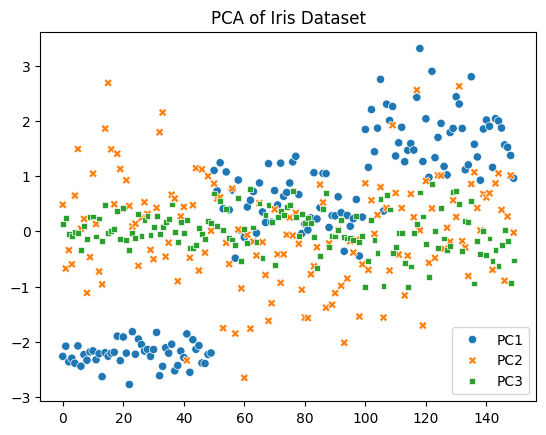

In [5]:
sns.scatterplot(data=df_pca)
plt.title('PCA of Iris Dataset')
plt.show()

### Preprocessing Diabetes Dataset

In [6]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/Haris-09/Machine-Learning/refs/heads/main/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
scaler = StandardScaler()
diabetes_scaled = scaler.fit_transform(diabetes.drop('Outcome', axis=1))
diabetes_scaled = pd.DataFrame(diabetes_scaled, columns=diabetes.columns[:-1])
diabetes_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### Model 1: Logistic Regression (All Features)

In [9]:
x = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [10]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
predictions=model.predict(x_test)
print(predictions)

[0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0]


In [12]:
score=model.score(x_test,y_test)
print(score)

0.7662337662337663


In [13]:
Accuracy_model1 = metrics.accuracy_score(y_test, predictions)
F1_Score_model1 = metrics.f1_score(y_test, predictions)
ROC_AUC_model1 = metrics.roc_auc_score(y_test, predictions)

In [14]:
print("Accuracy:", Accuracy_model1)
print("F1-Score:", F1_Score_model1)
print("ROC AUC:", ROC_AUC_model1)

Accuracy: 0.7662337662337663
F1-Score: 0.55
ROC AUC: 0.6848114169215087


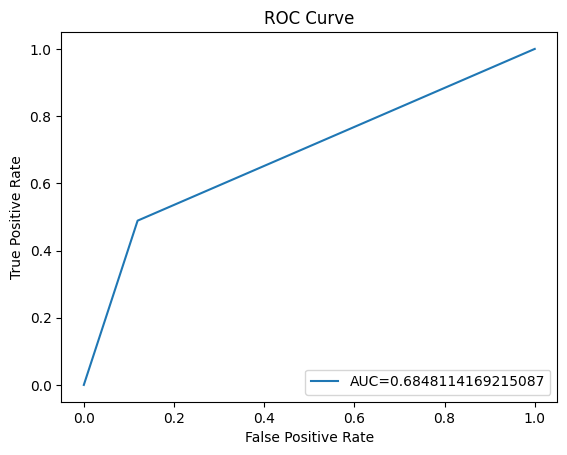

In [15]:
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

### Model 2: Logistic Regression (PCA - 2 Components)

In [16]:
pca = PCA(n_components=2)
pca_transform = pca.fit_transform(diabetes_scaled)
diabetes_pca = pd.DataFrame(pca_transform, columns=['PC1', 'PC2'])
display(diabetes_pca.head())
display(pca.explained_variance_ratio_)

,PC1,PC2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819


array([0.26179749, 0.21640127])

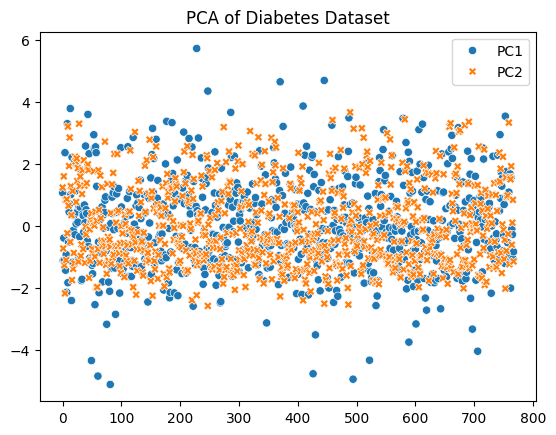

In [17]:
sns.scatterplot(data=diabetes_pca)
plt.title('PCA of Diabetes Dataset')
plt.show()

In [18]:
x = diabetes_pca
y = diabetes['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [19]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
predictions=model.predict(x_test)
print(predictions)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0]


In [21]:
score=model.score(x_test,y_test)
print(score)

0.7077922077922078


In [22]:
Accuracy_model2 = metrics.accuracy_score(y_test, predictions)
F1_Score_model2 = metrics.f1_score(y_test, predictions)
ROC_AUC_model2 = metrics.roc_auc_score(y_test, predictions)

In [23]:
print("Accuracy:", Accuracy_model2)
print("F1-Score:", F1_Score_model2)
print("ROC AUC:", ROC_AUC_model2)

Accuracy: 0.7077922077922078
F1-Score: 0.4578313253012048
ROC AUC: 0.6239551478083587


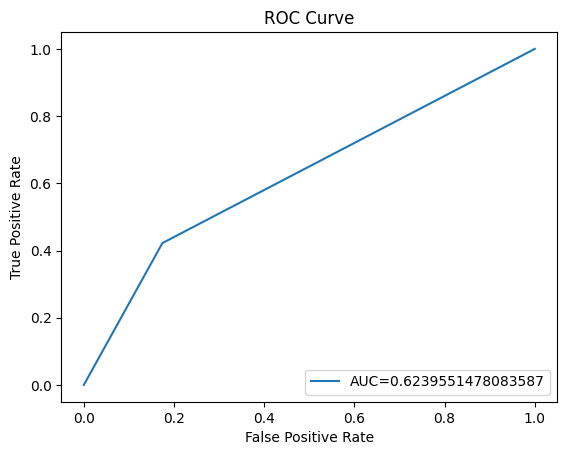

In [24]:
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

### Model 3: Logistic Regression (PCA - 6 Components)

In [25]:
pca = PCA(n_components=6)
pca_transform = pca.fit_transform(diabetes_scaled)
diabetes_pca = pd.DataFrame(pca_transform, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
display(diabetes_pca.head())
display(pca.explained_variance_ratio_)

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.068503,1.234895,-0.095930,0.496990,0.109985,0.357183
1,-1.121683,-0.733852,0.712938,0.285056,0.389507,-0.406329
2,-0.396477,1.595876,-1.760678,-0.070395,-0.906474,-0.040018
3,-1.115781,-1.271241,0.663729,-0.579123,0.356060,-0.412520
4,2.359334,-2.184819,-2.963107,4.033099,-0.592684,1.078341


array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855])

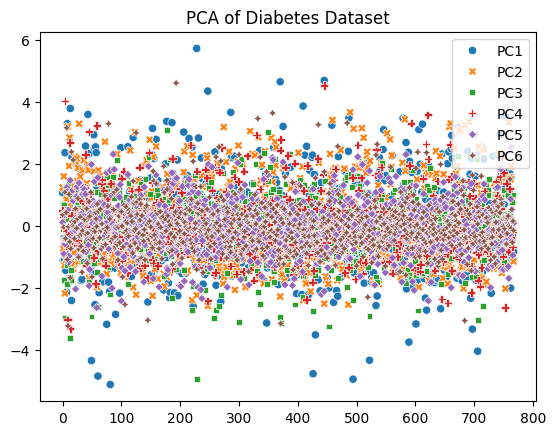

In [26]:
sns.scatterplot(data=diabetes_pca)
plt.title('PCA of Diabetes Dataset')
plt.show()

In [27]:
x = diabetes_pca
y = diabetes['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [28]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
predictions=model.predict(x_test)
print(predictions)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0]


In [30]:
score=model.score(x_test,y_test)
print(score)

0.7597402597402597


In [31]:
Accuracy_model3 = metrics.accuracy_score(y_test, predictions)
F1_Score_model3 = metrics.f1_score(y_test, predictions)
ROC_AUC_model3 = metrics.roc_auc_score(y_test, predictions)

In [32]:
print("Accuracy:", Accuracy_model3)
print("F1-Score:", F1_Score_model3)
print("ROC AUC:", ROC_AUC_model3)

Accuracy: 0.7597402597402597
F1-Score: 0.5542168674698795
ROC AUC: 0.6867482161060142


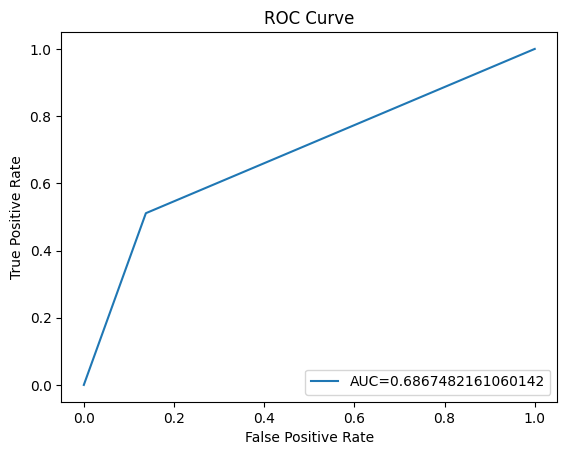

In [33]:
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

### Comparison

In [34]:
metrics_data = {'Model': ['Model 1 (All Features)', 'Model 2 (PCA - 2 Components)', 'Model 3 (PCA - 6 Components)'],
                'Accuracy': [Accuracy_model1, Accuracy_model2, Accuracy_model3],
                'F1-Score': [F1_Score_model1, F1_Score_model2, F1_Score_model3],
                'ROC AUC': [ROC_AUC_model1, ROC_AUC_model2, ROC_AUC_model3]}

metrics_df = pd.DataFrame(metrics_data)
display(metrics_df)

,Model,Accuracy,F1-Score,ROC AUC
0,Model 1 (All Features),0.766234,0.550000,0.684811
1,Model 2 (PCA - 2 Components),0.707792,0.457831,0.623955
2,Model 3 (PCA - 6 Components),0.759740,0.554217,0.686748
